# Introduction to Hypothesis Tests

## Learning Objectives

* How to state and interpret a hypothesis and support/reject it with statistical testing,
* How to perform 1-sided and 2-sided $t$-Tests,
* How to perform a $\chi^2$ and 1-way ANOVA test,
* Describe the relationship between Statistical Power and Effect Sizes.

-----

## Hypothesis Testing Basics

* Statistical tests are based a statement called the null hypothesis $H_0$ that assumes nothing interesting is going on between whatever variables ($\mu, p, \sigma, \textrm{etc.}$) you might be testing. 

* The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. 

* If there is little evidence against the null hypothesis given the data, you *accept* (**fail-to-reject**) the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis $H_a$. 

* The exact form of the alternative hypothesis $H_a$ will depend on the specific test you are carrying out. 

* Once you have the null and alternative hypothesis in hand, you choose a significance level (denoted by $\alpha$). 

* The significance level is a *probability threshold* that determines when you reject the null hypothesis. 

* After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. 

* This probability of seeing a result as extreme or more extreme than the one observed is known as the $p$-value.

## One-Sample $t$-Test

* https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

import scipy.stats as stats
import math
import random

In [32]:
np.random.seed(42)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

sample_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
sample_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
sample_ages = np.concatenate((sample_ages1, sample_ages2))

print(population_ages.mean())
print(sample_ages.mean())

42.998628
39.72


### Hypothesis

$$
H_0 : \quad \mu = 42.998628
$$

$$
H_a : \quad \mu \neq 42.998628
$$

In [33]:
stats.ttest_1samp(a=sample_ages,                  # Sample data
                 popmean=population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.1502410346712346, pvalue=0.03649747507423559)

### 95% Confidence ($\alpha=.05$)

In [36]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)    # Degrees of freedom

-2.0095752344892093

In [37]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)    # Degrees of freedom

2.009575234489209

In [38]:
# statistic=-2.1502410346712346

stats.t.cdf(x=-2.15,      # T-test statistic
            df= 49) * 2   # Mupltiply by two for two tailed test*

0.03651756251319

### Reject $H_0$!

## Two-Sample $t$-Test

* https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

In [49]:
np.random.seed(42)

new_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
new_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
new_ages = np.concatenate((new_ages1, new_ages2))

print(new_ages.mean())

42.44


In [50]:
stats.ttest_ind(a=sample_ages,
                b=new_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.2870506937293775, pvalue=0.20111338521248417)

## Type I and Type II Error

* https://www.simplypsychology.org/type_I_and_type_II_errors.html

![](https://www.simplypsychology.org/type-1-and-2-errors.jpg?ezimgfmt=rs:595x439/rscb13/ng:webp/ngcb13)

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.


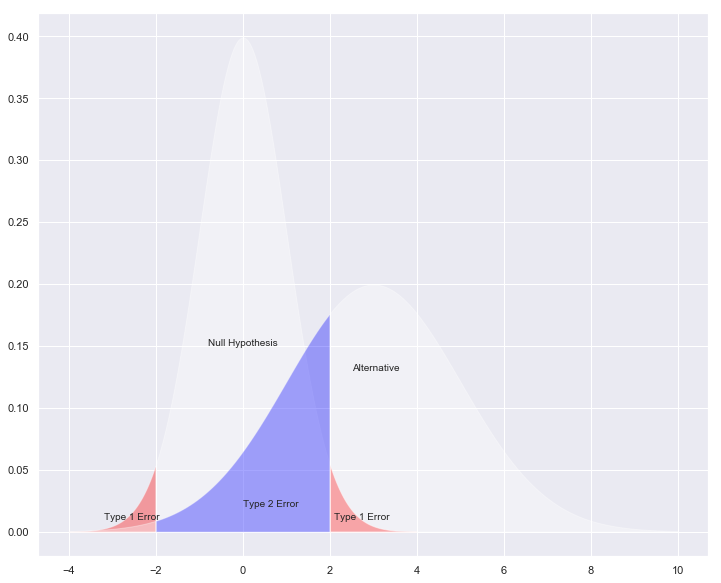

In [51]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

plt.show()

In [12]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

## $\chi^2$ (Goodness-Of-Fit) Test

* https://en.wikipedia.org/wiki/Goodness_of_fit
* https://en.wikipedia.org/wiki/Chi-squared_test

* The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. 

* Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-squared goodness of fit test to check whether they are different:


In [52]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

In [53]:
national_table

col_0,count
0,
asian,15000
black,50000
hispanic,60000
other,35000
white,100000


In [54]:
minnesota_table

col_0,count
0,
asian,75
black,250
hispanic,300
other,150
white,600


In [55]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()
chi_squared_stat

col_0
count    18.194805
dtype: float64

In [56]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


In [30]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

## One-Way ANOVA

* https://en.wikipedia.org/wiki/One-way_analysis_of_variance

* The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. 

* Essentially, it answers the question: do any of the group means differ from one another? 

* In the case of the ANOVA, you use the "f-distribution".

In [57]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [58]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [59]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095152)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952593)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593067)


## Effect Sizes and Statistical Power

![](http://www.psychology.emory.edu/clinical/bliwise/Tutorials/SPOWER/SPDIST.PNG)

* https://en.wikipedia.org/wiki/Effect_size#Interpretation

* https://en.wikipedia.org/wiki/Power_(statistics)#Interpretation

* https://www.kaggle.com/cast42/feature-selection-with-cohen-effect-size

* https://dfrieds.com/math/effect-size.html

* https://www.slideshare.net/karihay/type-i-type-ii-power-effect-size-live-presentation

# References / Resources

* https://machinelearningmastery.com/statistical-hypothesis-tests/
* https://machinelearningmastery.com/effect-size-measures-in-python/

## Further Reading

* https://en.wikipedia.org/wiki/Bonferroni_correction
* https://en.wikipedia.org/wiki/Tukey%27s_range_test
* https://en.wikipedia.org/wiki/Category:Statistical_tests
* https://en.wikipedia.org/wiki/Nonparametric_statistics

## $p$-Hacking
* https://en.wikipedia.org/wiki/Data_dredging